In [1]:
# ^^^ pyforest auto-imports - don't write above this line
library(ggplot2)
library(tidyverse)
library(viridis)
library(viridisLite)
library(readxl)
library(ggpubr)
library(dplyr)
library(Cairo)
library(hrbrthemes)
library(rlist)
library(orca)
library(gridExtra)
library(pheatmap)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: viridisLite

NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [7]:
complement_full <- read_excel("data.xlsx",sheet="complement ")
head(complement_full)

animal,group,treatment,replicate,index,concentrate
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
A01,A,control,0,C1q,414.1071
A01,A,control,1,C1q,426.6574
A01,A,control,2,C1q,400.0356
A03,A,control,0,C1q,526.4891
A03,A,control,1,C1q,511.2767
A03,A,control,2,C1q,541.8917


In [8]:
my_comparisons <- list( c("control", "UGAM"),c("Normal","Disease"))

In [9]:
complement_full$treatment <- factor(complement_full$treatment, levels=c("control", "UGAM", "Normal", "Disease"))

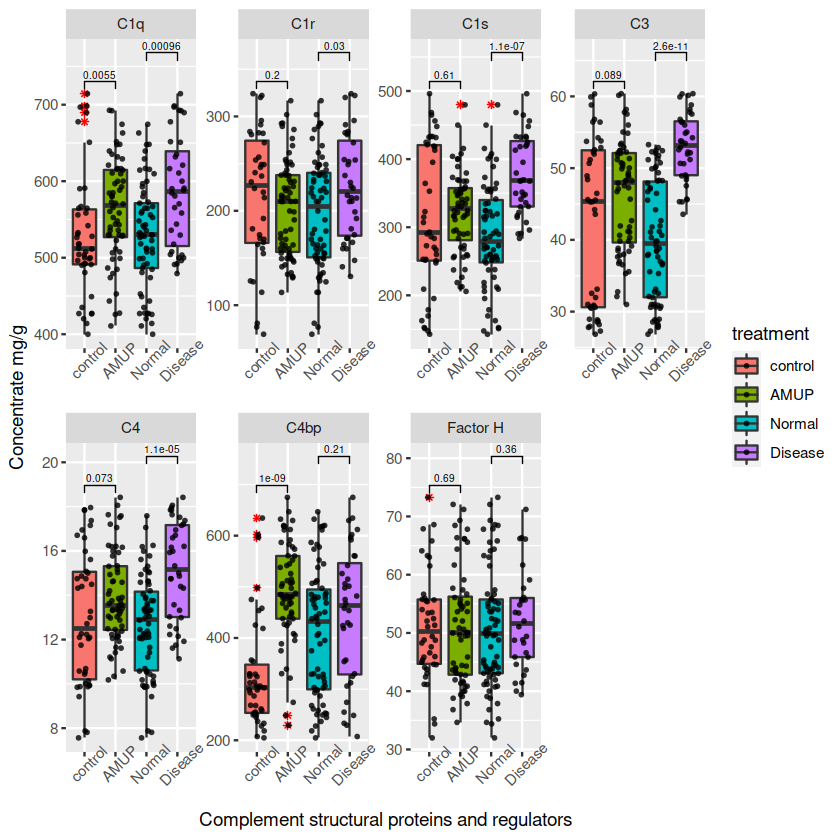

In [10]:
p_complement <- ggplot(complement_full, aes(x=treatment, y=concentrate, fill=treatment)) +
    geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=1.2) +
    geom_jitter(shape=16, size=1.0, position = position_jitter(0.25), alpha =0.8) +
    stat_compare_means(comparisons = my_comparisons, size=2, exact = TRUE) + # add pairwise comparison
    labs(y = "Concentrate（mg/g）", x = "Complement structural proteins and regulators")+
    theme(axis.text.x = element_text(angle=45))+
    facet_wrap(~index, scales="free", nrow=2)
p_complement

In [11]:
svg("complement.svg")
p_complement
dev.off()

png 
  2

In [9]:
p_complement <- ggplot(complement_full, aes(x=treatment, y=concentrate, fill=treatment)) +
    geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=1.2) +
    geom_jitter(shape=16, size=1.5, position = position_jitter(0.25), alpha =0.58) +
    stat_compare_means(comparisons = my_comparisons, size=2, exact = TRUE) + # add pairwise comparison
    labs(y = "Concentrate（ug/g）", x = "Complement structural proteins and regulators")+
    theme(axis.text.x = element_text(angle=45))+
    facet_wrap(~index,  scales="free", nrow=2)
svg("complement111.svg")
p_complement
dev.off()

png 
  2

In [10]:
# read the data
complement <- read_excel("complement.xlsx")
head(complement)

animal,group,type,treatment,replicate,daily_age,C1q,C1r,C1s,C3,C4,C4bp,Factor H
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A01,A,immune_enhancing,control,0,78,414.1071,223.7171,195.3220,31.95920,10.010727,324.3888,44.54619
A01,A,immune_enhancing,control,1,78,549.1675,248.9767,178.7352,30.46705,9.933771,329.1254,41.14568
A01,A,immune_enhancing,control,2,78,529.5957,246.0780,209.0890,30.72788,9.423933,313.5998,42.45357
A03,A,immune_enhancing,control,0,78,526.4891,113.7066,250.7218,33.12380,10.438799,236.7615,52.04476
A03,A,immune_enhancing,control,1,78,426.6574,124.7491,260.0104,30.64902,9.847194,250.1819,51.32542
A03,A,immune_enhancing,control,2,78,400.0356,125.7153,252.8781,32.54756,10.126162,244.6558,52.45893


In [11]:
# Convert the variable dose from a numeric to a factor variable
complement$replicate <- as.factor(complement$replicate)
complement$daily_age <- as.factor(complement$daily_age)
head(complement)

animal,group,type,treatment,replicate,daily_age,C1q,C1r,C1s,C3,C4,C4bp,Factor H
<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A01,A,immune_enhancing,control,0,78,414.1071,223.7171,195.3220,31.95920,10.010727,324.3888,44.54619
A01,A,immune_enhancing,control,1,78,549.1675,248.9767,178.7352,30.46705,9.933771,329.1254,41.14568
A01,A,immune_enhancing,control,2,78,529.5957,246.0780,209.0890,30.72788,9.423933,313.5998,42.45357
A03,A,immune_enhancing,control,0,78,526.4891,113.7066,250.7218,33.12380,10.438799,236.7615,52.04476
A03,A,immune_enhancing,control,1,78,426.6574,124.7491,260.0104,30.64902,9.847194,250.1819,51.32542
A03,A,immune_enhancing,control,2,78,400.0356,125.7153,252.8781,32.54756,10.126162,244.6558,52.45893


In [12]:
complement$treatment <- factor(complement$treatment, levels=c("control", "UGAM", "Normal", "Disease"))

In [13]:
complement_01 <- transform(complement, treatment=NULL)
head(complement_01)

,animal,group,type,replicate,daily_age,C1q,C1r,C1s,C3,C4,C4bp,Factor.H
,<chr>,<chr>,<chr>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,A01,A,immune_enhancing,0,78,414.1071,223.7171,195.3220,31.95920,10.010727,324.3888,44.54619
2,A01,A,immune_enhancing,1,78,549.1675,248.9767,178.7352,30.46705,9.933771,329.1254,41.14568
3,A01,A,immune_enhancing,2,78,529.5957,246.0780,209.0890,30.72788,9.423933,313.5998,42.45357
4,A03,A,immune_enhancing,0,78,526.4891,113.7066,250.7218,33.12380,10.438799,236.7615,52.04476
5,A03,A,immune_enhancing,1,78,426.6574,124.7491,260.0104,30.64902,9.847194,250.1819,51.32542
6,A03,A,immune_enhancing,2,78,400.0356,125.7153,252.8781,32.54756,10.126162,244.6558,52.45893


In [38]:
library(heatmaply)

In [39]:
complement_index <- complement_01[,c(6:12)]
head(complement_index)

,C1q,C1r,C1s,C3,C4,C4bp,Factor.H
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,414.1071,223.7171,195.3220,31.95920,10.010727,324.3888,44.54619
2,549.1675,248.9767,178.7352,30.46705,9.933771,329.1254,41.14568
3,529.5957,246.0780,209.0890,30.72788,9.423933,313.5998,42.45357
4,526.4891,113.7066,250.7218,33.12380,10.438799,236.7615,52.04476
5,426.6574,124.7491,260.0104,30.64902,9.847194,250.1819,51.32542
6,400.0356,125.7153,252.8781,32.54756,10.126162,244.6558,52.45893


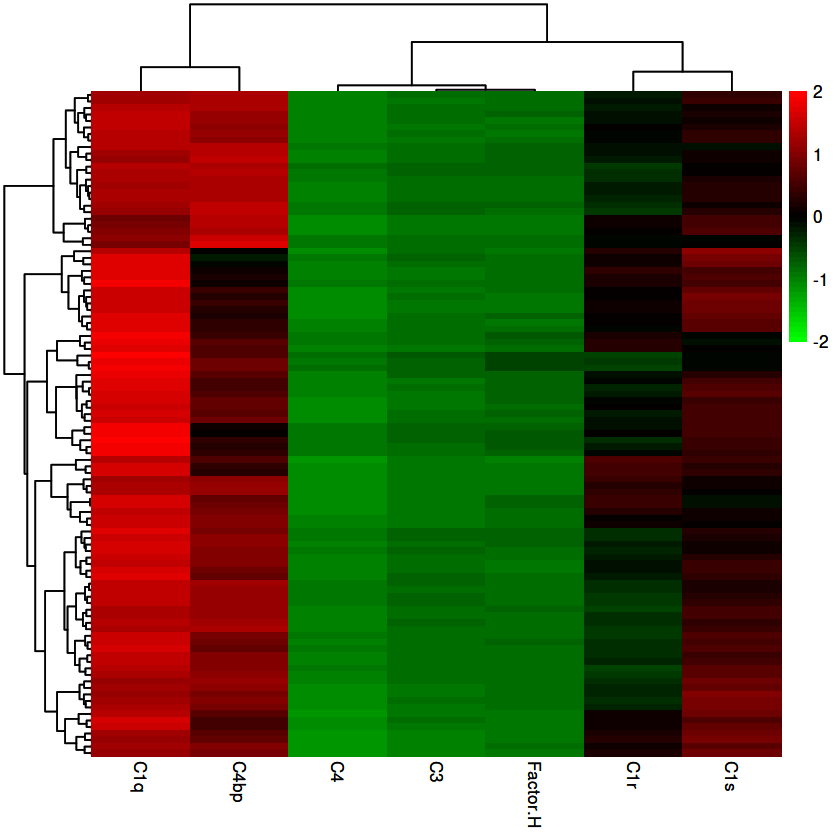

In [144]:
# to show the pheatmap figure
pheatmap_complement <- pheatmap(complement_index
                                , scale="row"
         , show_rownames = F
         , cluster_rows = T
#          ,border_color = "grey60"
         , cluster_distance_rows = "correlation" 
         , clustering_distance_cols = "manhattan"
                                ,color=colorRampPalette(c("green", "black","red"))(50)
#                                 , col = RColorBrewer::brewer.pal(9, "RdBu"),
                                , column_names_gp = grid::gpar(fontsize=60)
        )
print(pheatmap_complement)

In [143]:
save_pheatmap_svg <- function(x, filename, width=8, height=8){
    stopifnot(!missing(x))
    stopifnot(!missing(filename))
    svg(filename, width=width, height=height)
    grid::grid.newpage()
    grid::grid.draw(x$gtable)
    dev.off()
}
save_pheatmap_svg(pheatmap_complement,"pheatmap4444.svg")

png 
  2

In [106]:
library(grid)
library(lattice)
ggarrange(p_complement, save_pheatmap_svg, nrow=1)

ERROR: Error in grob$wrapvp <- vp: object of type 'closure' is not subsettable


In [131]:
library(ComplexHeatmap)
library(grid)

ERROR: Error in library(ComplexHeatmap): there is no package called ‘ComplexHeatmap’


In [132]:
pheatmap(complement_index, 
         , show_rownames = F
         , cluster_distance_rows = "correlation" 
#         , clustering_distance_cols = "manhattan"
        ,row_names_gp = grid::gpar(fontsize = 20, angle=135)
        )

Warning message in if (!is.na(kmeans_k)) {:
“the condition has length > 1 and only the first element will be used”


ERROR: Error in kmeans(mat, kmeans_k, iter.max = 100): must have same number of columns in 'x' and 'centers'


In [35]:
complement001 <- complement_01[,c(6, 7, 8, 3, 5)]
head(complement001)

,C1q,C1r,C1s,type,daily_age
,<dbl>,<dbl>,<dbl>,<chr>,<fct>
1,414.1071,223.7171,195.3220,immune_enhancing,78
2,549.1675,248.9767,178.7352,immune_enhancing,78
3,529.5957,246.0780,209.0890,immune_enhancing,78
4,526.4891,113.7066,250.7218,immune_enhancing,78
5,426.6574,124.7491,260.0104,immune_enhancing,78
6,400.0356,125.7153,252.8781,immune_enhancing,78


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



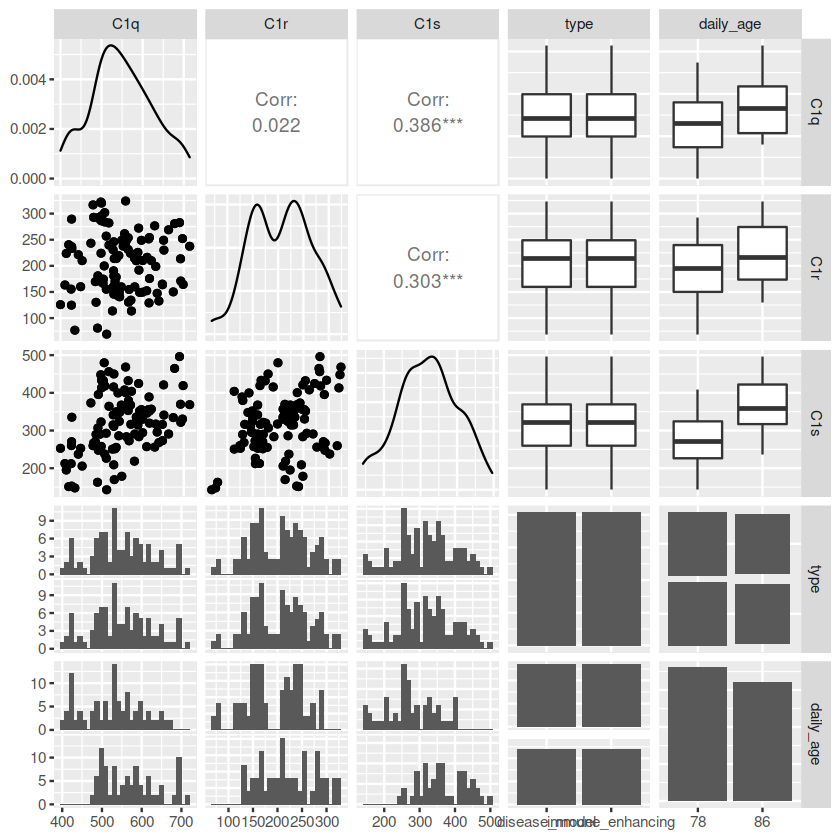

In [36]:
ggpairs(complement001)

`geom_smooth()` using formula 'y ~ x'



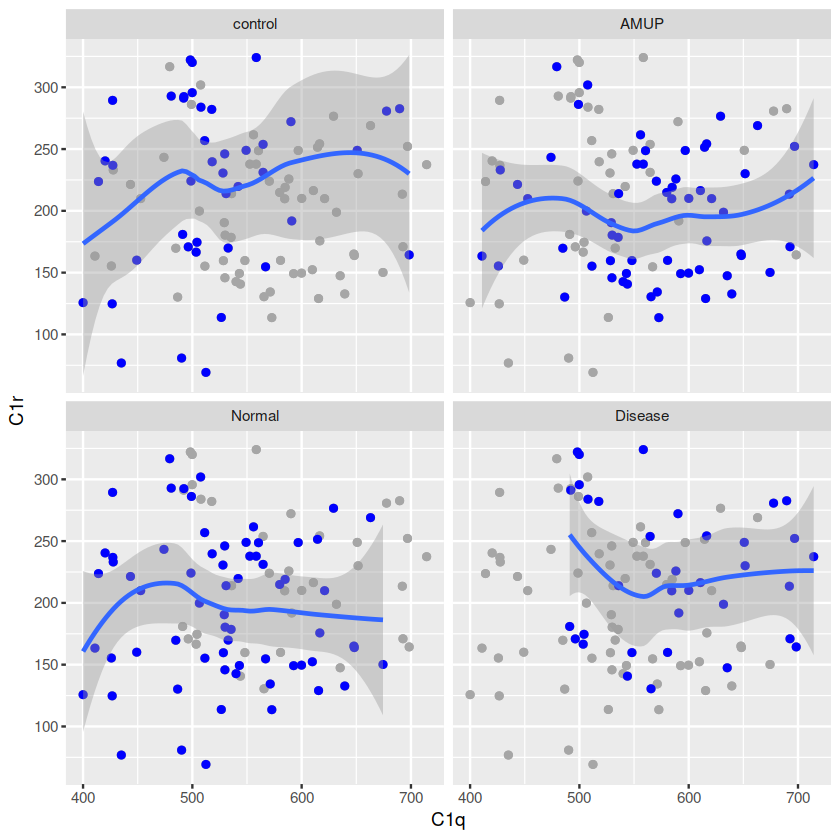

In [21]:
p1 <- ggplot(data = complement, mapping = aes(x=C1q, y=C1r), colour = treatment) +  # ` ` symbols is used to collect the column name with space
    geom_point(data = transform(complement, treatment=NULL), mapping = aes(x=C1q, y = C1r), colour = "grey65") + 
    geom_point(colour="blue") +    
    stat_smooth(method = "loess") +
    facet_wrap(vars(treatment))
p1

In [15]:
p1 <- ggplot(data = complement, mapping = aes(x=C4bp, y=`Factor H`), colour = treatment) +  # ` ` symbols is used to collect the column name with space
    geom_point(data = transform(complement, treatment=NULL), mapping = aes(x=C4bp, y = `Factor.H`), colour = "grey65") + 
    geom_point(colour="blue") +    
    stat_smooth(method = "lm") +
    facet_wrap(vars(treatment))
svg("correlation_c4bp_factorH.svg")
p1
dev.off()

`geom_smooth()` using formula 'y ~ x'



png 
  2

In [ ]:
# for depicting the corretion among differen complement proteins
# library ggcorrplot
library(ggcorrplot)

In [27]:
head(tips)

,total_bill,tip,sex,smoker,day,time,size
,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<int>
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4


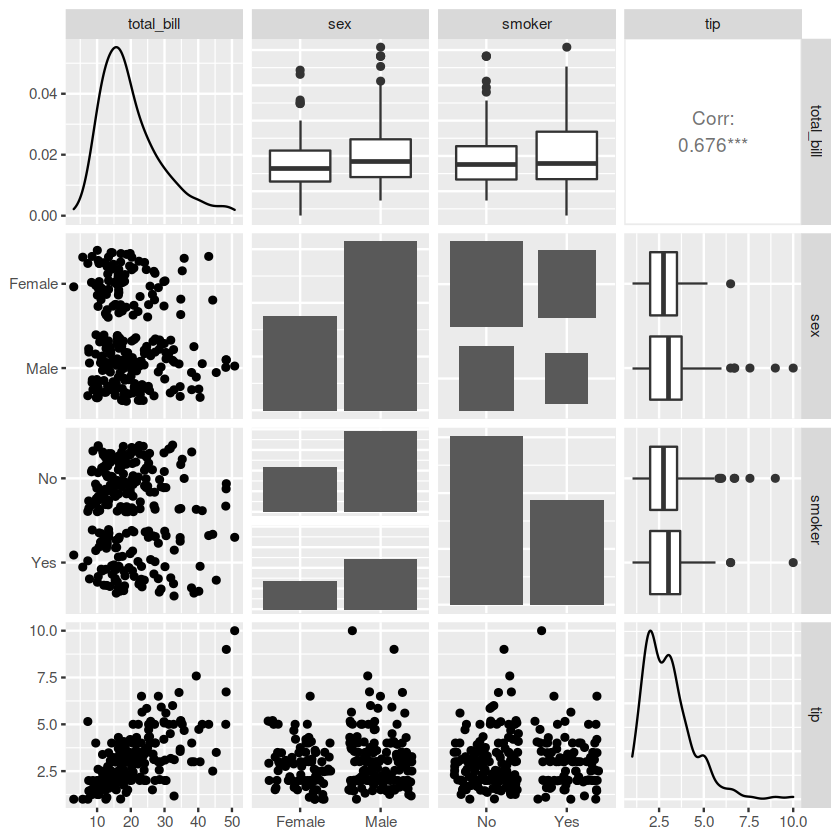

In [26]:
library(GGally)
data(tips, package = "reshape")
ggpairs(
    tips[,c(1, 3, 4, 2)],
    upper = list(continous = "identity", combo = "box_no_facet"),
    lower = list(continous = "points", combo = "dot_no_facet")
)

In [29]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



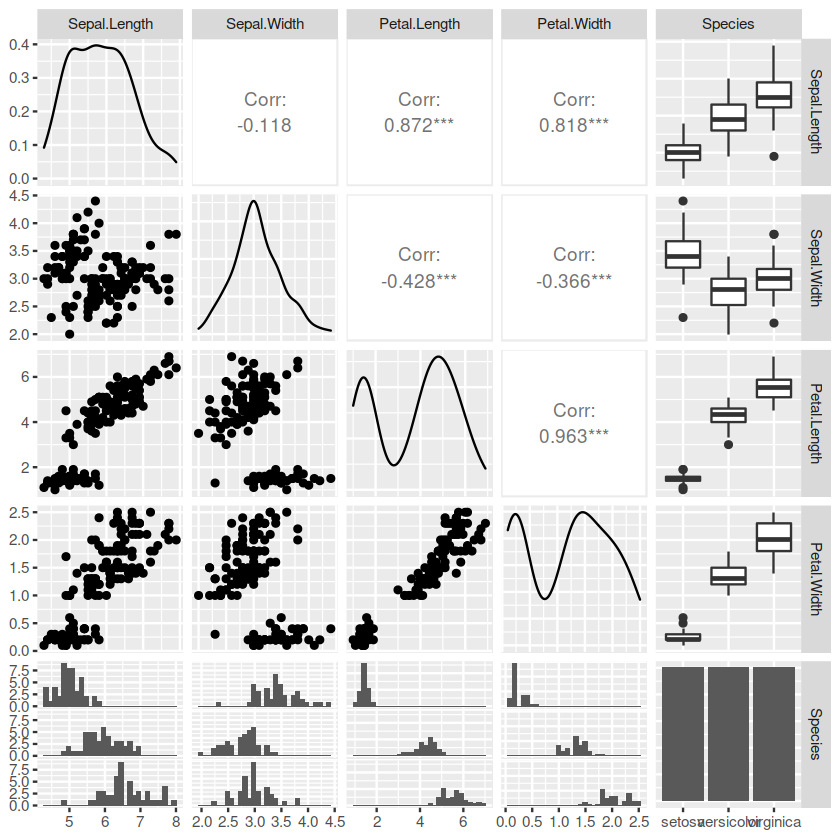

In [28]:
ggpairs(iris)

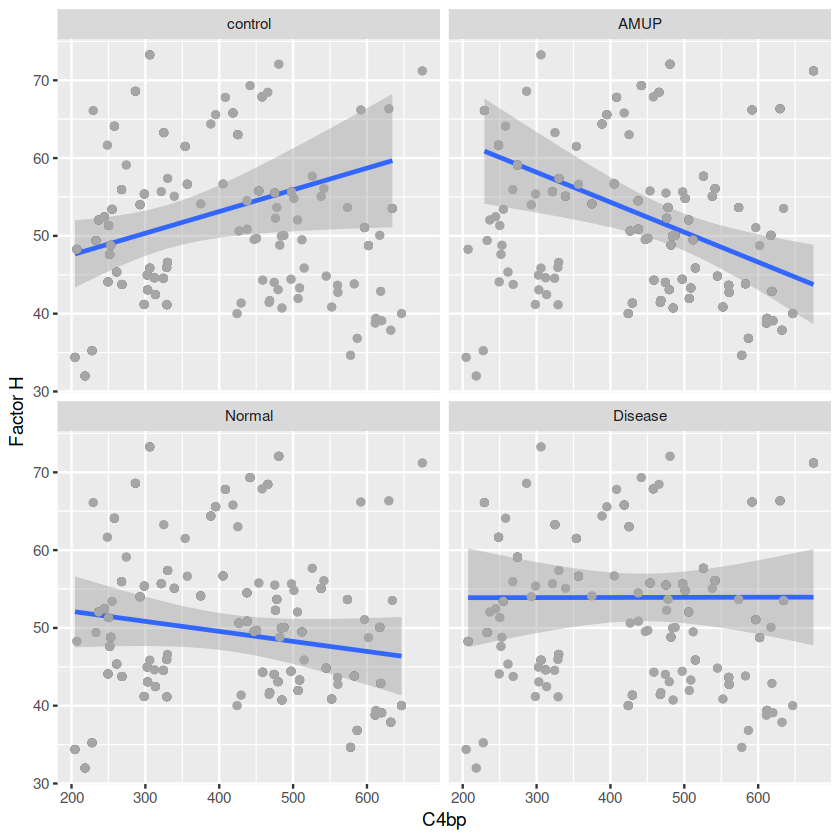

In [122]:
p1 + geom_point(data = transform(complement, treatment=NULL), mapping = aes(x=C4bp, y = `Factor.H`), colour = "grey65")

In [75]:
a <- c(1,3,6)
b <- c(2, 4, 7)
frame <- data.frame(a, b)
frame

a,b
<dbl>,<dbl>
1,2
3,4
6,7


In [76]:
frame$sum <- frame$a + frame$b
frame

a,b,sum
<dbl>,<dbl>,<dbl>
1,2,3
3,4,7
6,7,13


In [81]:
frame <- transform(frame)
frame

a,b
<dbl>,<dbl>
1,2
3,4
6,7


In [82]:
frame <- transform(frame, b=c(4, 29, 0))
frame

a,b
<dbl>,<dbl>
1,4
3,29
6,0


In [83]:
frame <- transform(frame, sum = a+b, mean=(a+b)/2)
frame

a,b,sum,mean
<dbl>,<dbl>,<dbl>,<dbl>
1,4,5,2.5
3,29,32,16.0
6,0,6,3.0


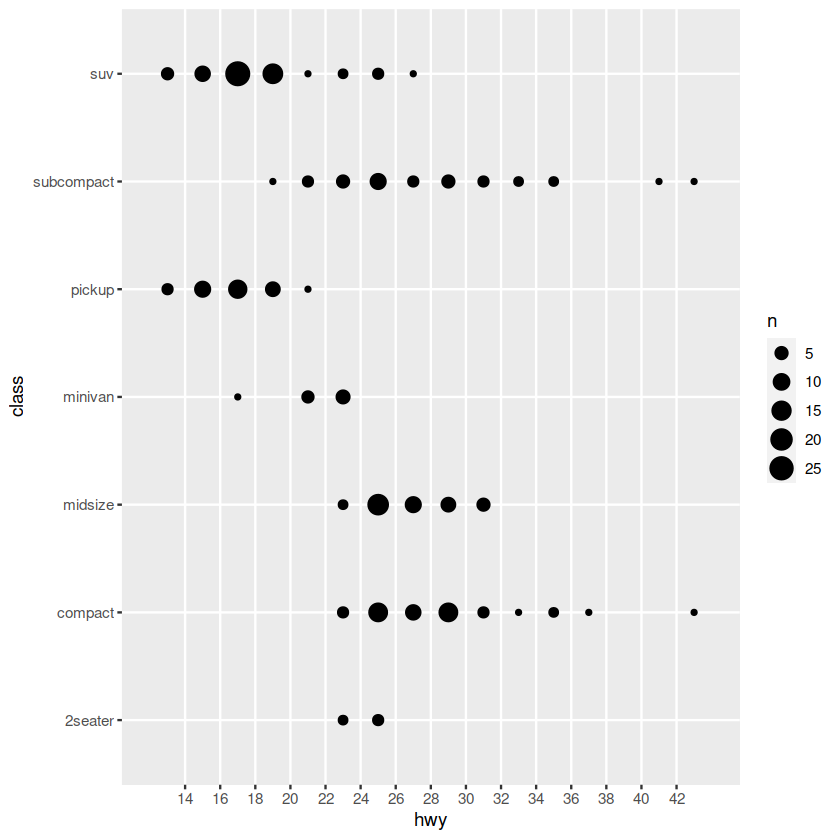

In [72]:
base <- ggplot(mpg, aes(hwy, class)) +
    geom_count() + 
    scale_x_binned(n.breaks = 20)
base

In [28]:
library(ggpmisc)
library(ggpp)
my.formula <- y ~ x
complement$type <- factor(complement$type, levels=c("immune_enhancing", "disease_model"))

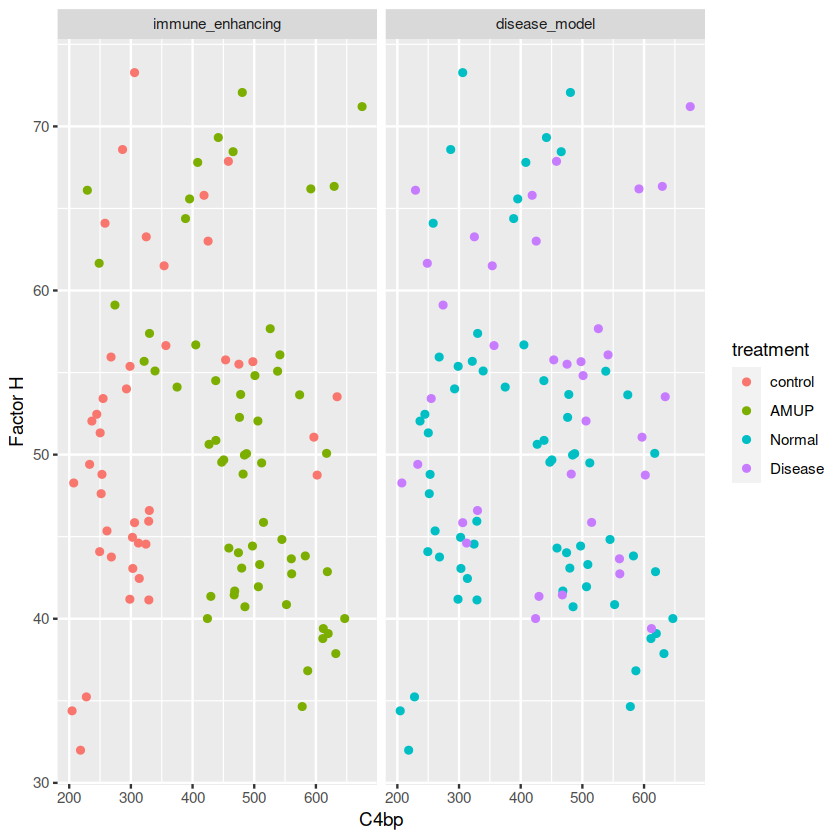

In [49]:
p1 <- ggplot(data = complement, mapping = aes(x=C4bp, y=`Factor H`, colour=treatment)) +  # ` ` symbols is used to collect the column name with space
    geom_point() + 
#     stat_smooth(method = "loess", formula = my.formula) +
    facet_wrap(vars(complement$type))
p1

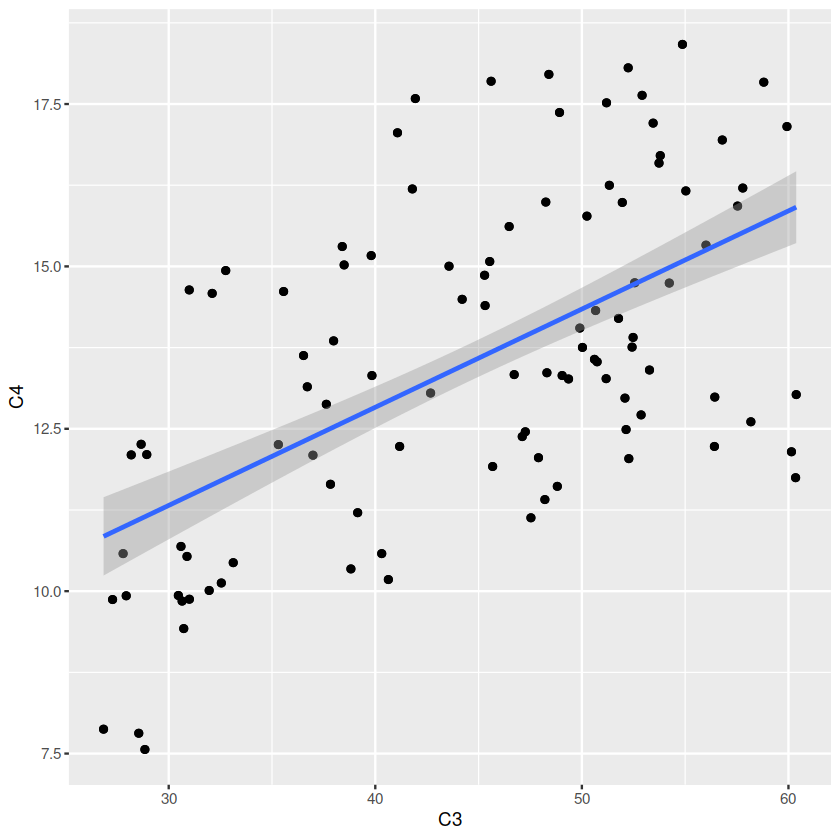

In [10]:
p1 <- ggplot(data = complement, mapping = aes(x=C3, y=C4)) +
    geom_point() + 
    stat_smooth(method = lm, formula = y ~ x, size = 1)
p1

`geom_smooth()` using formula 'y ~ x'



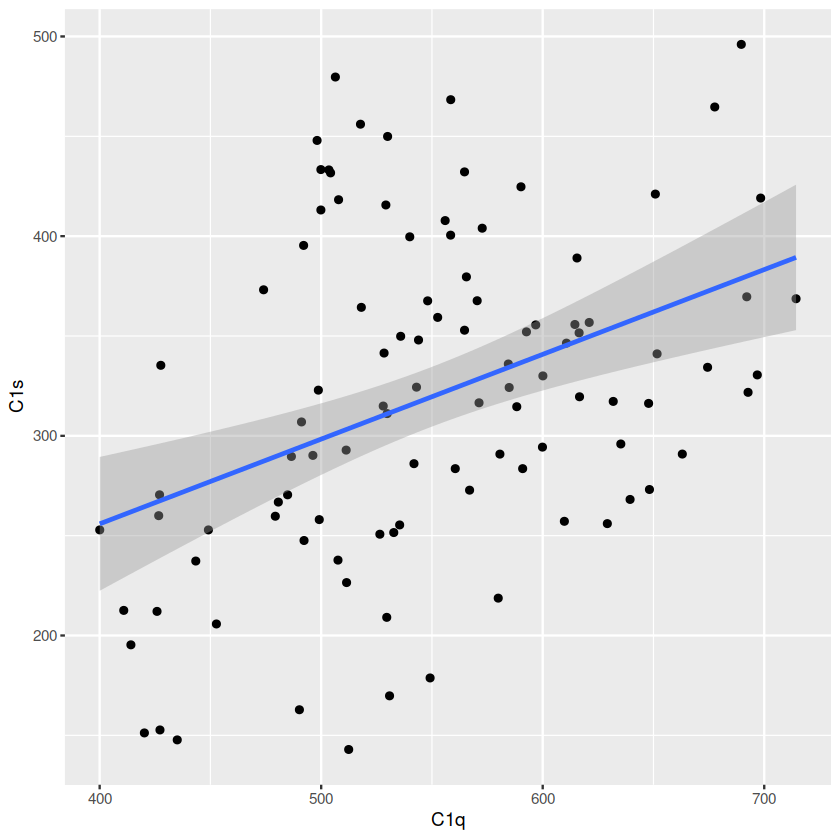

In [108]:
p1 <- ggplot(data = complement, mapping = aes(x=C1q, y=C1s)) +
    geom_point() + 
    stat_smooth(method = lm)
p1

`geom_smooth()` using formula 'y ~ x'



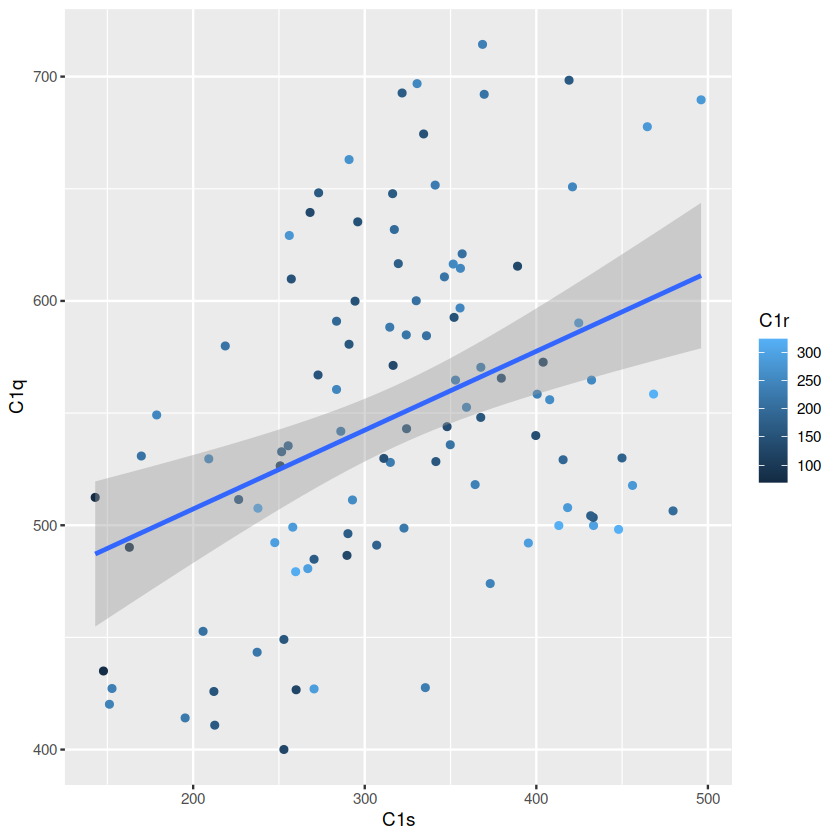

In [140]:
p1 <- ggplot(data = complement, mapping = aes(x=C1s, y=C1q, colour = C1r)) +
    geom_point() + 
    stat_smooth(method = lm) +
#     scale_fill_viridis_c(guide="legend") 
    scale_size_continuous(range=c(1, 15))
p1

In [185]:
# visualize : Specify the comparisons you want
my_comparisons <- list( c("C", "D"), c("C", "B"), c("C", "A"),c("B", "A"),c("B","D"),c("A","D"))
p_s <- ggplot(complement, aes(x=group, y=C1s, fill = group)) +
    geom_boxplot(outlier.colour="red", outlier.shape=8,
                outlier.size=4) +
    geom_jitter(shape=16, size = 2.2, position=position_jitter(0.2)) +
    stat_compare_means(comparisons = my_comparisons, label.y=c(500,530,560,590,620,650)) + # add pairwise comparison
    stat_compare_means(label.y=45)  + # add global p-value
    labs(title = expression(paste("C1s value with ", italic("Astragalus membranaceus"), "ultrafine particle"))
        , size =24)
svg("c1s.svg")
print(p_s)
dev.off()

Warning message in wilcox.test.default(c(373.132326557837, 407.798709909185, 400.50052394048, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(433.342360799652, 468.34047987685, 447.938732737062, :
“cannot compute exact p-value with ties”


png 
  2

In [186]:
# Basic box plot for C3 different components
my_comparisons <- list(c("B", "A"),c("C", "B"), c("C", "D"), c("C", "A"), c("A","D"), c("B","D"))
p_c1q <- ggplot(complement, aes(x=group, y=C1q, fill = group)) +
    geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4) + 
    geom_jitter(shape=16, size = 2.5, position=position_jitter(0.2)) +
    stat_compare_means(comparisons = my_comparisons, label.y=c(730,760,790,820,850,880)) + # add pairwise comparison
    stat_compare_means(label.y=220) +  # add global p-value
    labs(title = expression(paste("C1q value with ", italic("Astragalus membranaceus"), "ultrafine particle"))
        , size =24)

svg("c1q.svg")
print(p_c1q)
dev.off()

Warning message in wilcox.test.default(c(499.867330683876, 558.482660877657, 498.154010419792, :
“cannot compute exact p-value with ties”


png 
  2

In [187]:
# Basic box plot for C1r different components
my_comparisons <- list( c("B", "A"),c("C", "B"),c("C", "D"), c("C", "A"), c("B","D"), c("A", "D"))
p_r <- ggplot(complement, aes(x=group, y=C1r, fill = group)) +
    geom_boxplot(outlier.colour="red", outlier.shape=8,
                outlier.size=4) +
    geom_jitter(shape=16, size = 2.5,
                position=position_jitter(0.2)) +
    stat_compare_means(comparisons = my_comparisons, label.y=c(320,340,360,380,400,420)) + # add pairwise comparison
    stat_compare_means(label.y=45) +  # add global p-value
    labs(title = expression(paste("C1r value with ", italic("Astragalus membranaceus"), "ultrafine particle"))
        , size =24)

svg("c1r.svg")
print(p_r)
dev.off()

Warning message in wilcox.test.default(c(295.631025593332, 324.065341243801, 322.132912024837, :
“cannot compute exact p-value with ties”


png 
  2

In [188]:
# Basic box plot for C1r different components
my_comparisons <- list( c("B", "A"),c("B","C"),c("C", "D"), c("A","C"), c("B", "D"), c("D", "A"))
p_c3 <- ggplot(complement, aes(x=group, y=C3, fill = group)) +
    geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4) +
    geom_jitter(shape=16, size = 2.5, position=position_jitter(0.2)) +
    stat_compare_means(comparisons = my_comparisons, label.y=c(58,60,62,64,67,69)) + # add pairwise comparison
    stat_compare_means(label.y=20) +  # add global p-value
    labs(title = expression(paste("C3 within ", italic("Astragalus membranaceus"), "ultrafine particle"))
        , size =24)
svg("c3.svg")
p_c3
dev.off()

png 
  2

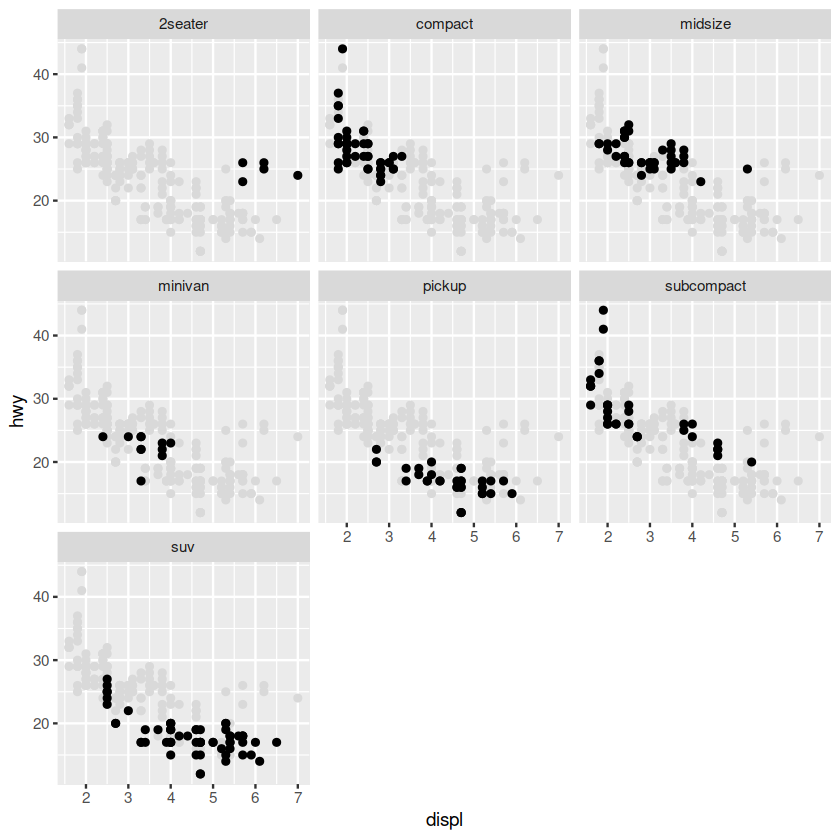

In [38]:
# To repeat the same data in every panel, simply construct a data frame
# that does not contain the faceting variable.
ggplot(mpg, aes(displ, hwy)) +
  geom_point(data = transform(mpg, class = NULL), colour = "grey85") +
  geom_point() +
  facet_wrap(vars(class))

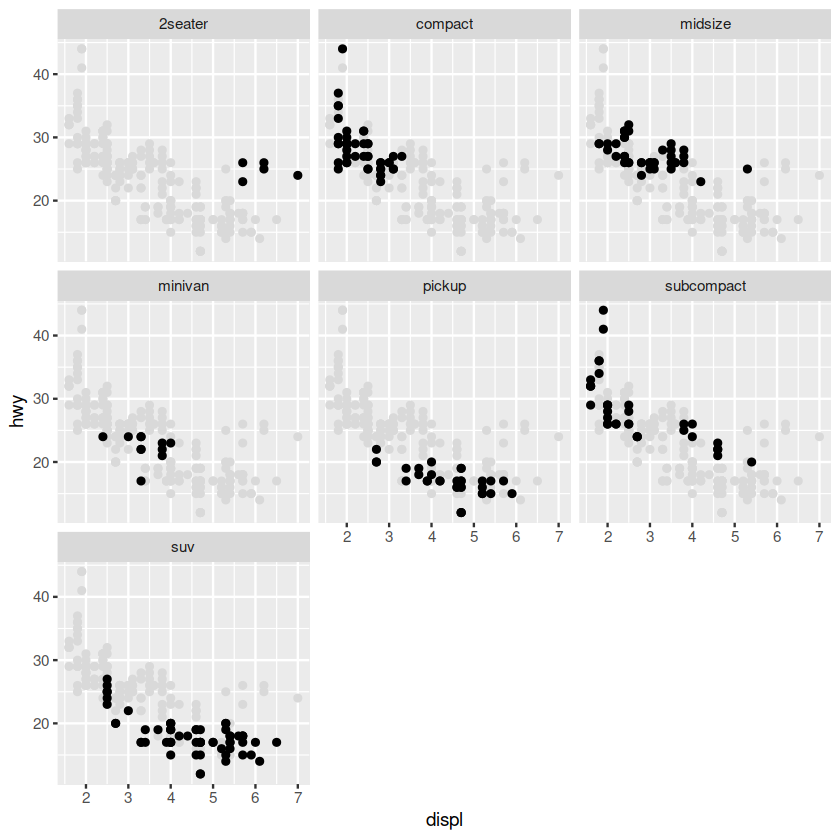

In [61]:
# To repeat the same data in every panel, simply construct a data frame
# that does not contain the faceting variable.
ggplot(mpg, aes(displ, hwy)) +
  geom_point(data = transform(mpg, class = NULL), colour = "grey85") +
  geom_point() +
  facet_wrap(vars(class))

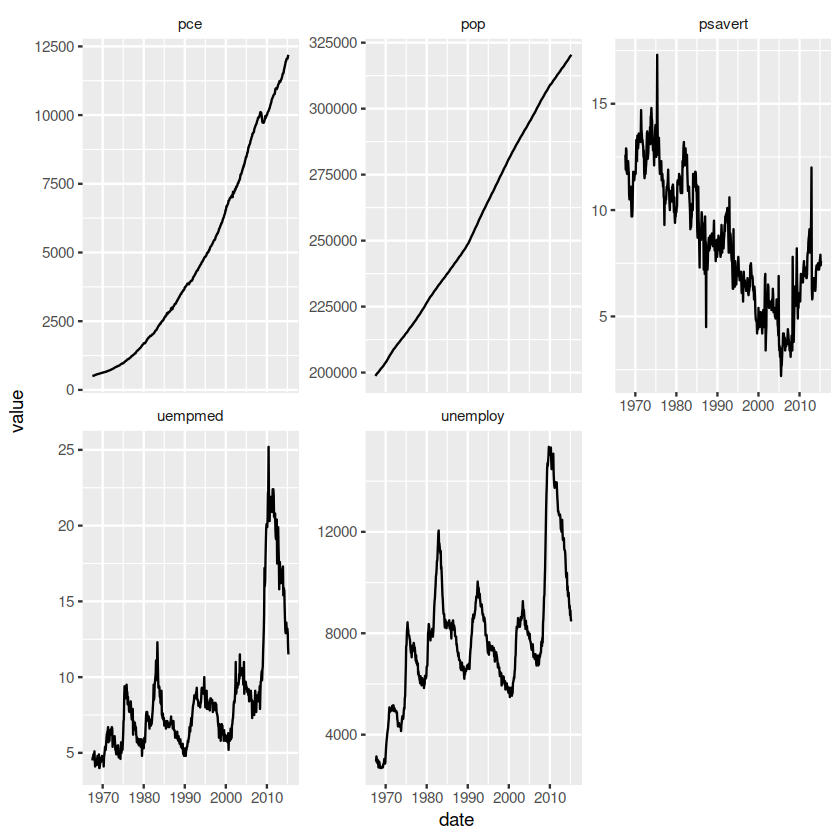

In [39]:
# Use `strip.position` to display the facet labels at the side of your
# choice. Setting it to `bottom` makes it act as a subtitle for the axis.
# This is typically used with free scales and a theme without boxes around
# strip labels.
ggplot(economics_long, aes(date, value)) +
  geom_line() +
  facet_wrap(vars(variable), scales = "free_y", nrow = 2, strip.position = "top") +
  theme(strip.background = element_blank(), strip.placement = "outside")
# }